code along

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
x=['which book is this','this is book and this is math']

In [3]:
cv=CountVectorizer()
count=cv.fit_transform(x) 

In [4]:
count.toarray()#bag of words

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]], dtype=int64)

In [5]:
cv.get_feature_names_out()

array(['and', 'book', 'is', 'math', 'this', 'which'], dtype=object)

In [6]:
bow=pd.DataFrame(count.toarray(),columns=cv.get_feature_names_out())

In [7]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [8]:
bow.shape

(2, 6)

In [9]:
tf=bow.copy()
for index,row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col]=tf.loc[index,col]/sum(row[1].values)

In [10]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


In [11]:
# inverse document frequency 
#idf=log((1+N)/(1+n))+1

In [ ]:
bow

In [13]:
bb=bow.astype('bool')

In [14]:
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [15]:
bb['is'].sum()

2

In [16]:
cols=bb.columns
cols

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [17]:
nz=[]
for col in cols:
    nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

In [18]:
N=2
idf=[]
for index,col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1))+1)

In [19]:
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

TFIDF=TF*IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
x

['which book is this', 'this is book and this is math']

In [22]:
tfidf=TfidfVectorizer()

In [23]:
X=tfidf.fit_transform(x)

In [24]:
X

<2x6 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [25]:
X.toarray()

array([[0.        , 0.44832087, 0.44832087, 0.        , 0.44832087,
        0.63009934],
       [0.39054766, 0.27787788, 0.55575576, 0.39054766, 0.55575576,
        0.        ]])

In [26]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [27]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


# Spam Text Classification

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df=pd.read_csv('spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [30]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [31]:
df.shape

(5572, 4)

In [32]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Balance Dataset

In [33]:
ham=df[df['label']=='spam']
ham.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [34]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [35]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [36]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [37]:
ham=ham.sample(spam.shape[0])

In [38]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [39]:
data=ham.append(spam,ignore_index=True)

C:\Users\Jones\AppData\Local\Temp\ipykernel_5460\3447091323.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam,ignore_index=True)


In [40]:
data.sample(5)

,label,message,length,punct
633,ham,Yes but I don't care cause I know its there!,44,2
1196,spam,Please CALL 08712402972 immediately as there i...,81,0
1285,spam,U've been selected to stay in 1 of 250 top Bri...,158,7
889,spam,"all the lastest from Stereophonics, Marley, Di...",162,6
1201,spam,Do you want a new Video phone? 600 anytime any...,157,1


In [41]:
data.shape

(1494, 4)

In [42]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

# Data Visualization

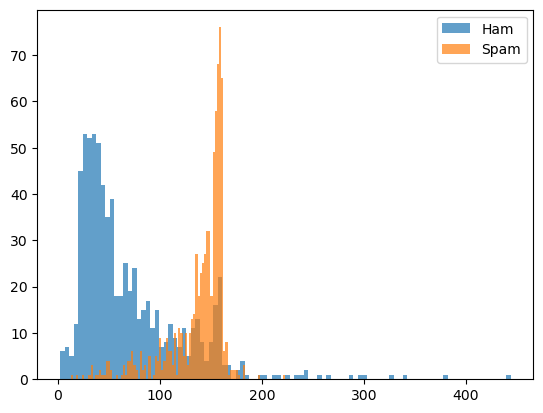

In [43]:
plt.hist(ham['length'],bins=100,alpha=0.7,label='Ham')
plt.hist(spam['length'],bins=100,alpha=0.7,label='Spam')
plt.legend()
plt.show()

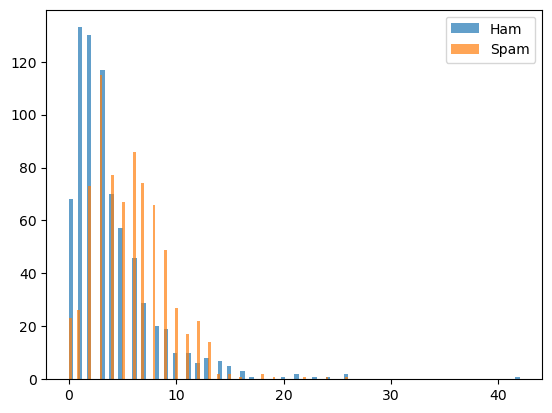

In [44]:
plt.hist(ham['punct'],bins=100,alpha=0.7,label='Ham')
plt.hist(spam['punct'],bins=100,alpha=0.7,label='Spam')
plt.legend()
plt.show()

# Data Preparation for training

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
data.head()

,label,message,length,punct
0,ham,Morning only i can ok.,22,1
1,ham,"Yeah, probably earlier than that",32,1
2,ham,Meeting u is my work. . . Tel me when shall i ...,65,3
3,ham,The world is running and i am still.maybe all ...,226,10
4,ham,"By the way, make sure u get train to worc fore...",90,2


In [48]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(data['message'])

In [49]:
X=X.toarray()

In [50]:
X.shape

(1494, 4573)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,data['label'],test_size=0.2,random_state=0,stratify=data['label'])

In [52]:
X_train.shape,X_test.shape

((1195, 4573), (299, 4573))

# Training your text classifier

In [53]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [54]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [55]:
y_pred=clf.predict(X_test)

In [56]:
confusion_matrix(y_test,y_pred)

array([[147,   3],
       [ 18, 131]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.98      0.93       150
        spam       0.98      0.88      0.93       149

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



# SVM

In [64]:
clf=SVC(C=1000,gamma='auto')

In [65]:
clf.fit(X_train,y_train)

SVC(C=1000, gamma='auto')

In [66]:
y_pred=clf.predict(X_test)

In [67]:
confusion_matrix(y_test,y_pred)

array([[144,   6],
       [ 18, 131]], dtype=int64)

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.96      0.92       150
        spam       0.96      0.88      0.92       149

    accuracy                           0.92       299
   macro avg       0.92      0.92      0.92       299
weighted avg       0.92      0.92      0.92       299



# Test model with Real data

In [69]:
clf

SVC(C=1000, gamma='auto')

In [70]:
def predict(x):
    x=tfidf.transform([x])
    x=x.toarray()
    pred=clf.predict(x)
    return pred

In [71]:
predict('hey,whatsup')

array(['ham'], dtype=object)

In [72]:
predict('you have got free tickets to USA this summer')

array(['spam'], dtype=object)